## Simple Market Agent Based Model
Herein I attempt to create a simple agent based model of a market to investigate the price setting mechanism. Agents follow simple behavioral rules regarding the prices they are willing to pay, for the buyers, and the price they are willing to receive, for sellers. They are initialzed with maximum acceptable prices and minimum accceptable prices for buyers and sellers, respectively. A transaction occurs if the buyer's maximum acceptable prices is a value greater than the seller's minimim acceptable. If a transaction takes place, the buyer agent is going to lower his maximum acceptable, and after a number of unsuccessful transaction the agents is going to raise its maximum acceptable, but not above his original maximum price. Reciprocally, the seller agent goes through a similar process.

Elías José Mantilla Ibarra

In [1]:
# Important libraries for the model
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(rc={'figure.figsize':(12,3)})

np.random.seed(123)
%config InlineBackend.figure_format = 'svg'

In [2]:
class Buyer(object):
    """
    Class Buyer contains relevant pieces of information for the buyer Agent's behavior
    """
    def __init__(self, max_willing):
        
        self.max_initial = max_willing
        
        self.max_acceptable = max_willing
        
        self.since_last_success = 0

In [3]:
class Seller(object):
    """
    Class Seller contains relevant pieces of information for the seller Agent's behavior
    """
    def __init__(self, min_willing):
        
        self.min_initial = min_willing
        
        self.min_acceptable = min_willing
        
        self.since_last_success = 0

In [4]:
def create_market(B, S):
    """
    Function to generate populations of buyers and sellers
    
    :returns: list of buyer Agents, list of seller Agents
    :rtype: list
    """
    buyers_list = []
    sellers_list = []
    
    for _ in range(B):
        agent_buyer = Buyer(np.random.normal(loc=12, scale=2))
        buyers_list.append(agent_buyer)
        
    for _ in range(S):
        agent_seller = Seller(np.random.normal(loc=8, scale=2))
        sellers_list.append(agent_seller)
        
    return buyers_list, sellers_list
    

In [5]:
def choose_pair(buyers_list, sellers_list):
    """
    Function to choose any buyer and any seller at random to be paired
    """
    buyer_agent = np.random.choice(buyers_list)
    seller_agent = np.random.choice(sellers_list)
    
    return buyer_agent, seller_agent

In [6]:
def transact_extended(buyer_agent, seller_agent):
    """
    Function that contains the transaction procedure followed by the agents
    """
    # starting price
    price = 0
    
    # if the buyer's maximum acceptable is greater than the minimun demanded by the seller, transact
    if buyer_agent.max_acceptable > seller_agent.min_acceptable:    
        price = (buyer_agent.max_acceptable + seller_agent.min_acceptable) / 2
        buyer_agent.max_acceptable = (buyer_agent.max_acceptable + price) / 2
        seller_agent.min_acceptable = (seller_agent.min_acceptable + price) / 2
        return price
    else:
        # if both seller and buyer have had three fails in a row, choose at random either buyer or seller
        # to accept the other agent's price if it doesn't exceed their max or min thresholds
        if buyer_agent.since_last_success > 3 and seller_agent.since_last_success > 3:
            if np.random.choice([1, 2]) == 1:
                if buyer_agent.max_initial > seller_agent.min_acceptable:
                    price = seller_agent.min_acceptable
                    buyer_agent.max_acceptable = seller_agent.min_acceptable
                    return price
                else:
                    return price
            else:
                if seller_agent.min_initial < buyer_agent.max_acceptable:
                    price = buyer_agent.max_acceptable
                    seller_agent.min_acceptable = buyer_agent.max_acceptable
                    return price
                else:
                    return price
        # if the buyer has had three fails in a row, then buyer accepts price proposed by seller. Only if 
        # it is smaller than its original, maximum price threshold. Otherwise, decline transaction
        elif buyer_agent.since_last_success > 3:
            if buyer_agent.max_initial > seller_agent.min_acceptable:
                price = seller_agent.min_acceptable
                buyer_agent.max_acceptable = seller_agent.min_acceptable
                return price
            else:
                return price
        # if the seller has had three fails in a row, then seller accepts price proposed by buyer. Only if 
        # it is greater than its original, minimum price threshold. Otherwise, decline transaction
        elif seller_agent.since_last_success > 3:
            if seller_agent.min_initial < buyer_agent.max_acceptable:
                price = buyer_agent.max_acceptable
                seller_agent.min_acceptable = buyer_agent.max_acceptable
                return price
            else:
                return price
            
        else:
            return price

In [7]:
def transact(buyer_agent, seller_agent):
    """
    Function that contains the transaction procedure followed by the agents
    """
    # starting price
    price = 0
    
    # if the buyer's maximum acceptable is greater than the minimun demanded by the seller, transact
    if buyer_agent.max_acceptable > seller_agent.min_acceptable:    
        price = (buyer_agent.max_acceptable + seller_agent.min_acceptable) / 2
        buyer_agent.max_acceptable = (buyer_agent.max_acceptable + price) / 2
        seller_agent.min_acceptable = (seller_agent.min_acceptable + price) / 2
        return price
    else:
        return price

In [8]:
def simulate(N, B, S):
    """
    Run a simulation
    """
    
    # create list with a starting price, average between the buyer's maximum price mean and 
    # the seller's minimum price mean. This is an arbitrary decision
    prices = [10]
    success_trans = 0
    buyers_list, sellers_list = create_market(B, S)
    
    for _ in range(N):
        buyer_agent, seller_agent = choose_pair(buyers_list, sellers_list)
        price = transact(buyer_agent, seller_agent)
        if price != 0:
            prices.append(price)
            success_trans += 1
            buyer_agent.since_last_success = 0
            seller_agent.since_last_success = 0
        else:
            prices.append(prices[-1])
            buyer_agent.since_last_success += 1
            seller_agent.since_last_success += 1
            
    return prices, success_trans

In [9]:
# Run a simulation with equal number of buyers and seller
results_equal, quantity_equal = simulate(10000, 250, 250)

Total of produce sold:  1768


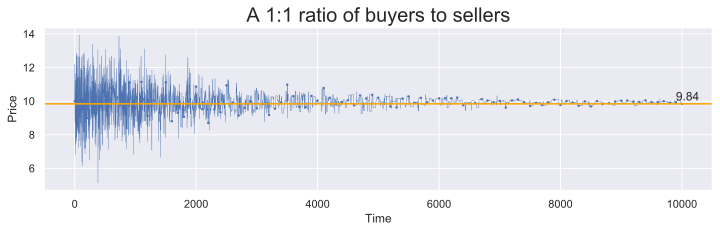

In [10]:
_ = plt.plot(results_equal, linewidth=0.4, marker='.', markersize = 3, markevery=100)
_ = plt.axhline(y=results_equal[-1], color='orange')
_ = plt.text(9900, 0.2 + results_equal[-1], str(round(results_equal[-1], 2)))
_ = plt.ylabel('Price')
_ = plt.xlabel('Time')
_ = plt.title('A 1:1 ratio of buyers to sellers', size = 20)

print("Total of produce sold: ", quantity_equal)

As seen in the plot, the prices converged towards a price that was close to mean of the price that the average buyer was willing the pay and the average seller demanded, afer a period of great variability that lasted for well over 4,000 ticks. The choice of a normal distribution with mean 8 for sellers and mean 12 for buyer was completely arbitrary. Maybe I will have to come up with some other idea in the future. 

In [11]:
results_more_demand, quantity_demand = simulate(10000, 400, 100)

Total of produce sold:  1226


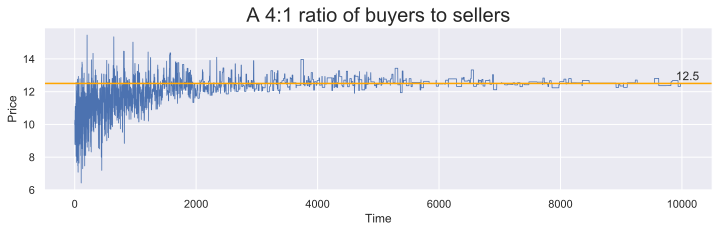

In [12]:
_ = plt.plot(results_more_demand, linewidth=0.8)
_ = plt.axhline(y=results_more_demand[-1], color='orange')
_ = plt.text(9900, 0.2 + results_more_demand[-1], str(round(results_more_demand[-1], 2)))
_ = plt.ylabel('Price')
_ = plt.xlabel('Time')
_ = plt.title('A 4:1 ratio of buyers to sellers', size = 20)

print("Total of produce sold: ", quantity_demand)


In the plot above we see how the price converges to a higher value than in the previous case. This, as I suppose, is because there being more buyers than sellers, a random seller is going to participate in more transactions than a random buyer, thus sellers are going to be able update their preferences first and therefore impose them.

In [13]:
results_more_supply, quantity_supply = simulate(10000, 400, 100)

Total of produce sold:  1302


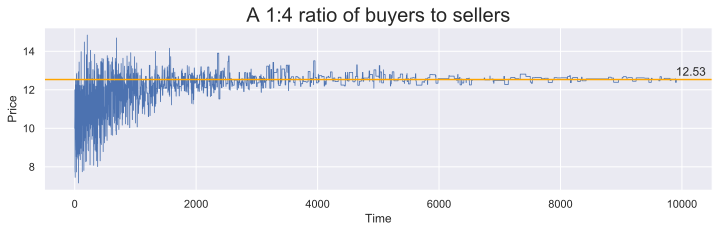

In [14]:
_ = plt.plot(results_more_supply, linewidth=0.8)
_ = plt.axhline(y=results_more_supply[-1], color='orange')
_ = plt.text(9900, 0.2 + results_more_supply[-1], str(round(results_more_supply[-1], 2)))
_ = plt.ylabel('Price')
_ = plt.xlabel('Time')
_ = plt.title('A 1:4 ratio of buyers to sellers', size = 20)


print("Total of produce sold: ", quantity_supply)

In the case of supply being greater than than demand, buyers are going to interact in more transaction than the seller, thereby updating preference quicker.

In [15]:
results, quantity = simulate(10000, 100, 100)

Total of produce sold:  824


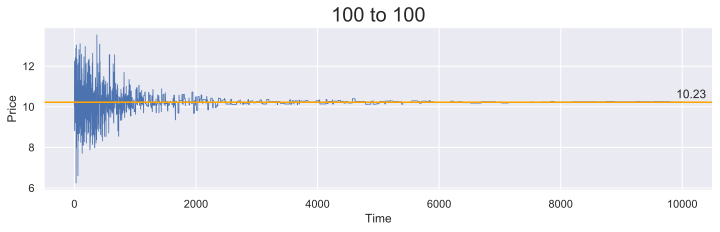

In [16]:
_ = plt.plot(results, linewidth=0.8)
_ = plt.axhline(y=results[-1], color='orange')
_ = plt.text(9900, 0.2 + results[-1], str(round(results[-1], 2)))
_ = plt.ylabel('Price')
_ = plt.xlabel('Time')
_ = plt.title('100 to 100', size = 20)


print("Total of produce sold: ", quantity)

In [17]:
results, quantity = simulate(10000, 100, 150)

Total of produce sold:  909


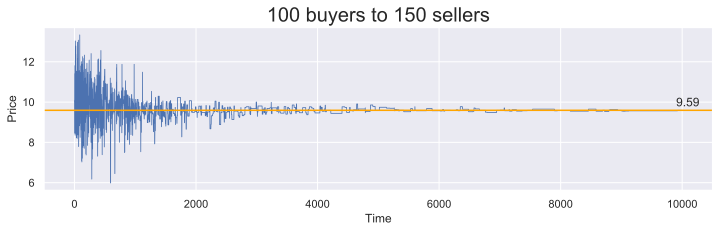

In [18]:
_ = plt.plot(results, linewidth=0.8)
_ = plt.axhline(y=results[-1], color='orange')
_ = plt.text(9900, 0.2 + results[-1], str(round(results[-1], 2)))
_ = plt.ylabel('Price')
_ = plt.xlabel('Time')
_ = plt.title('100 buyers to 150 sellers', size = 20)


print("Total of produce sold: ", quantity)

In [19]:
results, quantity = simulate(10000, 100, 300)

Total of produce sold:  1166


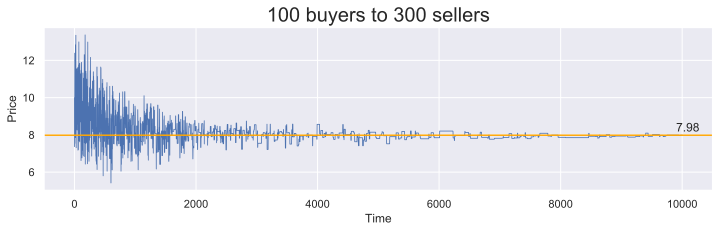

In [20]:
_ = plt.plot(results, linewidth=0.8)
_ = plt.axhline(y=results[-1], color='orange')
_ = plt.text(9900, 0.2 + results[-1], str(round(results[-1], 2)))
_ = plt.ylabel('Price')
_ = plt.xlabel('Time')
_ = plt.title('100 buyers to 300 sellers', size = 20)


print("Total of produce sold: ", quantity)

In [21]:
results, quantity = simulate(10000, 150, 100)

Total of produce sold:  888


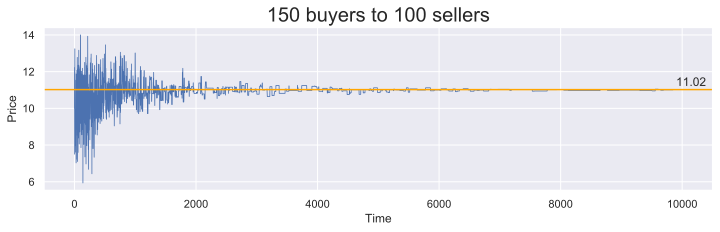

In [22]:
_ = plt.plot(results, linewidth=0.8)
_ = plt.axhline(y=results[-1], color='orange')
_ = plt.text(9900, 0.2 + results[-1], str(round(results[-1], 2)))
_ = plt.ylabel('Price')
_ = plt.xlabel('Time')
_ = plt.title('150 buyers to 100 sellers', size = 20)


print("Total of produce sold: ", quantity)

In [23]:
results, quantity = simulate(10000, 300, 100)

Total of produce sold:  1254


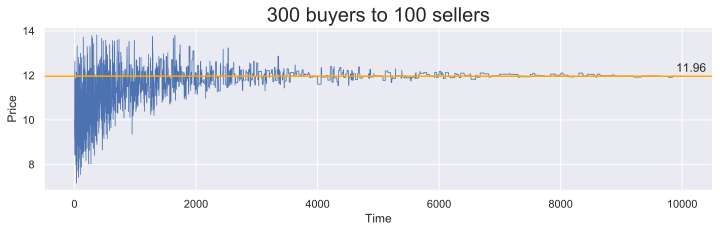

In [24]:
_ = plt.plot(results, linewidth=0.8)
_ = plt.axhline(y=results[-1], color='orange')
_ = plt.text(9900, 0.2 + results[-1], str(round(results[-1], 2)))
_ = plt.ylabel('Price')
_ = plt.xlabel('Time')
_ = plt.title('300 buyers to 100 sellers', size = 20)


print("Total of produce sold: ", quantity)